In [1]:
import pandas as pd
import borough_complaints
import matplotlib.pyplot as plt
import sys

In [2]:
sys.argv = ['borough_complaints.py', '-i', 'filtered_nyc311.csv', '-s', '01-01-2020', '-e', '02-29-2020', '-o', 'Jan-Feb.csv']
borough_complaints.main()

In [3]:
sys.argv = ['borough_complaints.py', '-i', 'filtered_nyc311.csv', '-s', '06-01-2020', '-e', '07-31-2020', '-o', 'Jun-Jul.csv']
borough_complaints.main()

In [4]:
jan_feb = pd.read_csv('Jan-Feb.csv')
jun_jul = pd.read_csv('Jun-Jul.csv')

In [6]:
jan_feb_grouped = jan_feb.groupby('type')['count'].sum().reset_index()
jun_jul_grouped = jun_jul.groupby('type')['count'].sum().reset_index()

most_common = jan_feb_grouped.loc[jan_feb_grouped['count'].idxmax()]
complaint = most_common['type']
print(f'Most abundant complaint type in Jan-Feb 2020: {complaint}')

Most abundant complaint type in Jan-Feb 2020: heat/hot water


Text(0, 0.5, 'Number of Complaints')

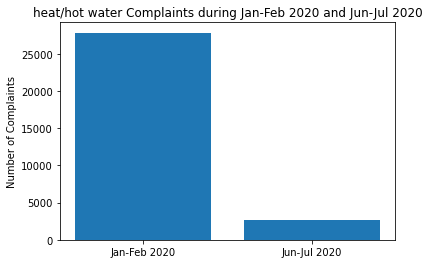

In [7]:
jan_feb_count = jan_feb_grouped[jan_feb_grouped['type'] == complaint]['count'].sum()
jun_jul_count = jun_jul_grouped[jun_jul_grouped['type'] == complaint]['count'].sum()

labels = ['Jan-Feb 2020', 'Jun-Jul 2020']
counts = [jan_feb_count, jun_jul_count]
plt.bar(labels, counts)
plt.title(f'{complaint} Complaints during Jan-Feb 2020 and Jun-Jul 2020')
plt.ylabel('Number of Complaints')

In [8]:
print(counts)

[27841, 2652]


This analysis revealed that the most common complaint type (heat/hot water) was much more common in Jan-Feb over Jun-Jul, by a large amount. In Jan-Feb it's 27841, while in June-July it's only 2652. Probably because during summer there is less of a need for hot water. This indicates that there is a significant shortage of heat and hot water in NYC during winter. 